In [ ]:
import cv2
import numpy as np
import random

# Load the grayscale image
image = cv2.imread('/content/new.jpg', cv2.IMREAD_GRAYSCALE)

# Define a threshold value based on pixel intensity
threshold_value = 95  # Adjust as needed

# Create a binary mask based on the threshold
binary_mask = (image >= threshold_value).astype(np.uint8) * 255

# Find connected components
_, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask, connectivity=8)

# Find the largest connected component (excluding background)
background_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

# Create an image with only the largest component
largest_component_image = np.zeros_like(binary_mask)
largest_component_image[labels == background_label] = 255  # Set the largest component to white
largest_component_image[labels == 0] = 0

# Identify border pixels connected to the image edges
border_pixels = set()

# Identify border pixels along the top and bottom edges
for i in range(largest_component_image.shape[1]):
    if largest_component_image[0, i] == 255:
        border_pixels.add((0, i))
    if largest_component_image[-1, i] == 255:
        border_pixels.add((largest_component_image.shape[0] - 1, i))

# Identify border pixels along the left and right edges
for i in range(largest_component_image.shape[0]):
    if largest_component_image[i, 0] == 255:
        border_pixels.add((i, 0))
    if largest_component_image[i, -1] == 255:
        border_pixels.add((i, largest_component_image.shape[1] - 1))


# Create a list to store the selected edge pixels and their neighbors
selected_pixels = []



for pixel in border_pixels:
    selected_pixels.append(pixel)
    for _ in range(random.randint(30, 40)):  # Adjust the range here
        # Find neighbors for the selected pixel
        neighbors = [(pixel[0] + dy, pixel[1] + dx) for dy in [-1, 0, 1] for dx in [-1, 0, 1] if dy != 0 or dx != 0]
        # Randomly select a neighbor
        neighbor = random.choice(neighbors)
        selected_pixels.append(neighbor)

# Set the selected pixels to the opposite color of the largest component
for pixel in selected_pixels:
    y, x = pixel
    if 0 <= y < largest_component_image.shape[0] and 0 <= x < largest_component_image.shape[1]:
        if largest_component_image[y, x] == 255:
            largest_component_image[y, x] = 0
        else:
            largest_component_image[y, x] = 255

inverted_image = 255 - largest_component_image
# Display the modified largest component
cv2_imshow(inverted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import os

# Specify the folder paths
input_folder = '/content/drive/MyDrive/Cyclone images/Original images'  # Folder containing the grayscale images
output_folder = '/content/drive/MyDrive/Cyclone images/mask_images'  # Folder to save the mask images

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List the image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

# Define a threshold value based on pixel intensity
threshold_value = 94  # Adjust as needed

# Process each image and generate masks
for image_file in image_files:
    # Load the grayscale image
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create a binary mask based on the threshold
    binary_mask = (image >= threshold_value).astype(np.uint8) * 255

    # Find connected components
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask, connectivity=8)

    # Find the largest connected component (excluding background)
    background_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

    # Create an image with only the largest component
    largest_component_image = np.zeros_like(binary_mask)
    largest_component_image[labels == background_label] = 255  # Set the largest component to black
    largest_component_image[labels == 0] = 0

    # Invert the image by subtracting from 255 (255 - pixel_value)
    inverted_image = 255 - largest_component_image

    # Save the mask image with the same name as the original image
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, inverted_image)

    print(f"Processed: {image_file} -> Saved as mask")

print("All images processed and saved as masks.")

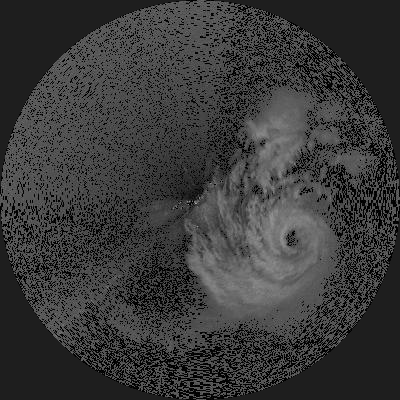

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/RMC.jpeg')
# Convert the image to grayscale if it's a color image
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Replace all pixels with a value of 255 with 0
image[image > 200] = 30

# Save the modified image
cv2.imwrite('modified_image.jpg', image)
cv2_imshow(image)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from IPython.display import display
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import os
import numpy as np

# Function to process images and save inverted images
def process_and_save_images(input_folder, output_folder, threshold_value):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
            # Read the image in grayscale
            image_path = os.path.join(input_folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Create a binary mask based on the threshold
            binary_mask = (image >= threshold_value).astype(np.uint8) * 255

            # Find connected components
            _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask, connectivity=8)

            # Find the largest connected component (excluding background)
            background_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

            # Create an image with only the largest component
            largest_component_image = np.zeros_like(binary_mask)
            largest_component_image[labels == background_label] = 255

            # Invert the image
            inverted_image = 255 - largest_component_image

            # Save the inverted image to the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, inverted_image)

# Define input and output folders
input_folder = '/content/drive/MyDrive/titli/titli1/'  # Specify the folder containing input images
output_folder = '/content/drive/MyDrive/titli/mask_folder1/'  # Specify the folder to save the inverted images
threshold_value = 79  # Threshold value for binarization (adjust as needed)

# Process images and save inverted images
process_and_save_images(input_folder, output_folder, threshold_value)


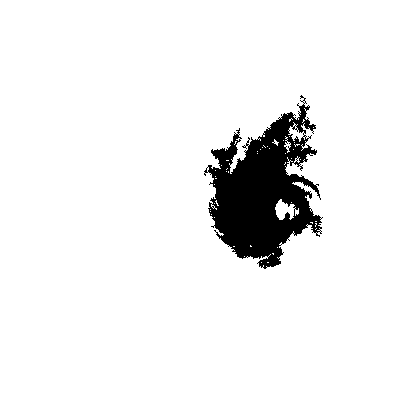

In [ ]:

# Load the grayscale image
image = cv2.imread('/content/drive/MyDrive/titli/titli1/43.jpg', cv2.IMREAD_GRAYSCALE)

# Define a threshold value based on pixel intensity
threshold_value = 79  # Adjust as needed

# Create a binary mask based on the threshold
binary_mask = (image >= threshold_value).astype(np.uint8) * 255

# Find connected components
_, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask, connectivity=8)

# Find the largest connected component (excluding background)
background_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

# Create an image with only the largest component
largest_component_image = np.zeros_like(binary_mask)
largest_component_image[labels == background_label] = 255 # Set the largest component to black
largest_component_image[labels == 0] = 0
# Invert the image by subtracting from 255 (255 - pixel_value)
inverted_image =255- largest_component_image
# Display the largest component

cv2_imshow(inverted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import os
import random

image_folder = '/content/drive/MyDrive/titli/titli1'  # Folder containing the grayscale images
mask_folder = '/content/drive/MyDrive/titli/mask_folder1'
output_folder = '/content/drive/MyDrive/titli/background1'      # Folder to save background images

# Create the output folder for background images if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each image and its corresponding mask
image_files = os.listdir(image_folder)
mask_files = os.listdir(mask_folder)

# Iterate over all files in the folders
for i, image_filename in enumerate(image_files):
    # Load the image
    image_path = os.path.join(image_folder, image_filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Load the corresponding mask
    mask_filename = mask_files[i]
    mask_path = os.path.join(mask_folder, mask_filename)
    object_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or object_mask is None:
        print(f"Skipping {image_filename} and {mask_filename} as they do not exist.")
        continue

    # Create a copy of the original image
    result_image = image.copy()

    # Define the offset (150 pixels to the left)
    offset = -150

    # Iterate through the rows and columns of the object mask
    for row in range(object_mask.shape[0]):
        for col in range(object_mask.shape[1]):
            if object_mask[row, col] == 0:  # Check if it's part of the object
                # Copy the corresponding background pixel from the offset position
                col_offset = col + offset
                if 0 <= col_offset < image.shape[1]:
                    background_pixel = image[row, col_offset]
                    # Check if the background pixel is not from the object
                    if object_mask[row, col_offset] == 255:
                        result_image[row, col] = background_pixel
                    else:
                        result_image[row, col] = random.randint(40, 80)

                else:
                    # If the pixel goes out of bounds, assign it a pixel value of 40
                    result_image[row, col] = random.randint(40, 80)

    # Save the resulting background image with the same name as the input image
    background_filename = f"{image_filename}"
    background_path = os.path.join(output_folder, background_filename)
    cv2.imwrite(background_path, result_image)

    print(f"Processed: {image_filename} and {mask_filename} -> Saved background as {background_filename}")

print("All images processed and background images saved.")


Processed: 18.jpg and 18.jpg -> Saved background as 18.jpg
Processed: 16.jpg and 16.jpg -> Saved background as 16.jpg
Processed: 17.jpg and 17.jpg -> Saved background as 17.jpg
Processed: 19.jpg and 19.jpg -> Saved background as 19.jpg
Processed: 20.jpg and 20.jpg -> Saved background as 20.jpg
Processed: 42.jpg and 42.jpg -> Saved background as 42.jpg
Processed: 41.jpg and 41.jpg -> Saved background as 41.jpg
Processed: 43.jpg and 43.jpg -> Saved background as 43.jpg
Processed: 50.jpg and 50.jpg -> Saved background as 50.jpg
Processed: 51.jpg and 51.jpg -> Saved background as 51.jpg
Processed: 65.jpg and 65.jpg -> Saved background as 65.jpg
Processed: 68.jpg and 68.jpg -> Saved background as 68.jpg
Processed: 67.jpg and 67.jpg -> Saved background as 67.jpg
Processed: 56.jpg and 56.jpg -> Saved background as 56.jpg
Processed: 60.jpg and 60.jpg -> Saved background as 60.jpg
Processed: 64.jpg and 64.jpg -> Saved background as 64.jpg
Processed: 54.jpg and 54.jpg -> Saved background as 54.j

In [ ]:
import cv2
import os
import random

image_folder = '/content/drive/MyDrive/titli/titli'  # Folder containing the grayscale images
mask_folder = '/content/drive/MyDrive/titli/mask_folder'
output_folder = '/content/drive/MyDrive/titli/background'      # Folder to save background images

# Create the output folder for background images if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get the list of files in the image folder
image_files = os.listdir(image_folder)

# Process each image and its corresponding mask
for image_filename in image_files:
    # Ensure it's a JPG file
    if not image_filename.lower().endswith('.jpg'):
        continue

    # Form the complete paths for image and mask
    image_path = os.path.join(image_folder, image_filename)
    mask_filename = image_filename
    mask_path = os.path.join(mask_folder, mask_filename)

    # Load the image and mask
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    object_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or object_mask is None:
        print(f"Skipping {image_filename} and {mask_filename} as they do not exist.")
        continue

    # Create a copy of the original image
    result_image = image.copy()

    # Define the offset (200 pixels to the left)
    offset = -120

    # Iterate through the rows and columns of the object mask
    for row in range(object_mask.shape[0]):
        for col in range(object_mask.shape[1]):
            if object_mask[row, col] == 0:  # Check if it's part of the object
                # Copy the corresponding background pixel from 200 pixels to the left
                col_offset = col + offset
                if 0 <= col_offset < image.shape[1]:
                    background_pixel = image[row, col_offset]
                    # Check if the background pixel is not from the object
                    if object_mask[row, col_offset] == 255:
                        result_image[row, col] = background_pixel
                    else:
                        result_image[row, col] = random.randint(40, 80)

                else:
                    # If the pixel goes out of bounds, assign it a pixel value of 40
                    result_image[row, col] = random.randint(40, 80)

    # Save the resulting background image
    background_filename = f"background_{image_filename}"
    background_path = os.path.join(output_folder, background_filename)
    cv2.imwrite(background_path, result_image)

    print(f"Processed: {image_filename} and {mask_filename} -> Saved background as {background_filename}")

print("All images processed and background images saved.")


Processed: 1.jpg and 1.jpg -> Saved background as background_1.jpg
Processed: 10.jpg and 10.jpg -> Saved background as background_10.jpg
Processed: 18.jpg and 18.jpg -> Saved background as background_18.jpg
Processed: 2.jpg and 2.jpg -> Saved background as background_2.jpg
Processed: 21.jpg and 21.jpg -> Saved background as background_21.jpg
Processed: 8.jpg and 8.jpg -> Saved background as background_8.jpg
Processed: 6.jpg and 6.jpg -> Saved background as background_6.jpg
Processed: 16.jpg and 16.jpg -> Saved background as background_16.jpg
Processed: 11.jpg and 11.jpg -> Saved background as background_11.jpg
Processed: 4.jpg and 4.jpg -> Saved background as background_4.jpg
Processed: 7.jpg and 7.jpg -> Saved background as background_7.jpg
Processed: 17.jpg and 17.jpg -> Saved background as background_17.jpg
Processed: 5.jpg and 5.jpg -> Saved background as background_5.jpg
Processed: 3.jpg and 3.jpg -> Saved background as background_3.jpg
Processed: 9.jpg and 9.jpg -> Saved backgrou

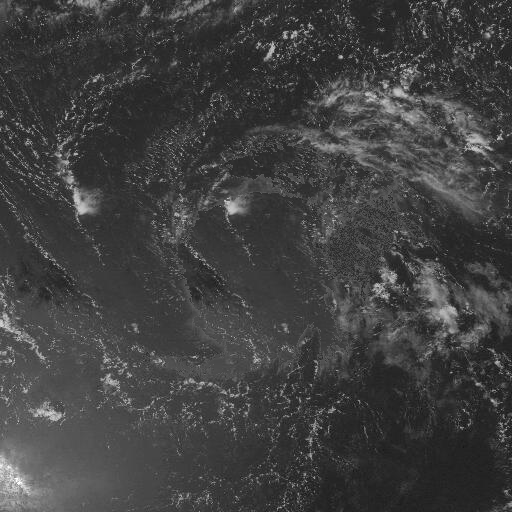

In [ ]:
import random
object_mask = inverted_image
# Find the coordinates of the object in the mask
coords = np.column_stack(np.where(object_mask == 0))

# Create a copy of the original image
result_image = image.copy()

# Define the offset (200 pixels to the left)
offset = -150

    # Iterate through the rows and columns of the object mask
for row in range(object_mask.shape[0]):
  for col in range(object_mask.shape[1]):
    if object_mask[row, col] == 0:  # Check if it's part of the object
                # Copy the corresponding background pixel from 200 pixels to the left

        col_offset = col + offset
        if 0 <= col_offset < image.shape[1]:
          background_pixel = image[row, col_offset]
          # Check if the background pixel is not from the object
          if object_mask[row, col_offset] == 255:
            result_image[row, col] = background_pixel
          else:
            result_image[row, col] = random.randint(40, 80)
        # If the pixel goes out of bounds, assign it a pixel value of 40
        else:
          result_image[row, col] = random.randint(40, 80)


cv2_imshow(result_image)

In [ ]:
cv2.imwrite('background.jpg', result_image)

True

In [ ]:
def add_obj(background, img, mask, x, y):
    '''
    Arguments:
    background - background image in CV2 grayscale format
    img - image of object in CV2 grayscale format
    mask - mask of object in CV2 grayscale format
    x, y - coordinates of the center of the object image

    Function returns background with added object in CV2 grayscale format

    CV2 grayscale format is a numpy array with dimensions width x height
    '''

    bg = np.array(background)  # Convert background to NumPy array
    img = np.array(img)  # Convert img to NumPy array
    mask = np.array(mask)  # Convert mask to NumPy array

    h_bg, w_bg = bg.shape
    h, w = img.shape

    # Calculating coordinates of the top left corner of the object image
    x = x - int(w/2)
    y = y - int(h/2)

    mask_boolean = mask == 0
    mask_rgb_boolean = np.stack([mask_boolean, mask_boolean, mask_boolean], axis=2)

    if x >= 0 and y >= 0:
        h_part = h - max(0, y+h-h_bg) # h_part - part of the image which overlaps background along y-axis
        w_part = w - max(0, x+w-w_bg) # w_part - part of the image which overlaps background along x-axis
        bg[y:y+h_part, x:x+w_part] = bg[y:y+h_part, x:x+w_part] * ~mask_boolean[0:h_part, 0:w_part] + (img * mask_boolean)[0:h_part, 0:w_part]
    elif x < 0 and y < 0:
        h_part = h + y
        w_part = w + x
        bg[0:0+h_part, 0:0+w_part] = bg[0:0+h_part, 0:0+w_part] * ~mask_boolean[h-h_part:h, w-w_part:w] + (img * mask_boolean)[h-h_part:h, w-w_part:w]
    elif x < 0 and y >= 0:
        h_part = h - max(0, y+h-h_bg)
        w_part = w + x
        bg[y:y+h_part, 0:0+w_part] = bg[y:y+h_part, 0:0+w_part] * ~mask_boolean[0:h_part, w-w_part:w] + (img * mask_boolean)[0:h_part, w-w_part:w]
    elif x >= 0 and y < 0:
        h_part = h + y
        w_part = w - max(0, x+w-w_bg)
        bg[0:0+h_part, x:x+w_part] = bg[0:0+h_part, x:x+w_part] * ~mask_boolean[h-h_part:h, 0:w_part] + (img * mask_boolean)[h-h_part:h, 0:w_part]

    return bg

# Function to get position name
def position_name(position):
    positions = ['tl', 'tr', 'bl', 'br', 'left', 'right', 'top', 'bottom']
    return positions[position]



In [ ]:
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import os

image_folder = '/content/drive/MyDrive/titli/titli/'  # Folder containing the grayscale images
mask_folder = '/content/drive/MyDrive/titli/mask_folder/'
background_folder = '/content/drive/MyDrive/titli/background'      # Folder to save background images
# Define the positions for all eight locations
positions = [
    (70, 120),   # Top Left
    (250, 120),  # Top Right
    (70, 250),   # Bottom Left
    (240, 250),  # Bottom Right
    (60, 200),   # Left
    (240, 200),  # Right
    (200, 60),  # Top
    (200, 250),  # Bottom
]

# Create output dictionaries for all positions
output_folders = [
    '/content/drive/MyDrive/Cyclone images/Top left',
    '/content/drive/MyDrive/Cyclone images/Top right',
    '/content/drive/MyDrive/Cyclone images/Bottom left',
    '/content/drive/MyDrive/Cyclone images/Bottom right',
    '/content/drive/MyDrive/Cyclone images/Left',
    '/content/drive/MyDrive/Cyclone images/Right',
    '/content/drive/MyDrive/Cyclone images/Top',
    '/content/drive/MyDrive/Cyclone images/Bottom'
]

# Iterate through images, masks, backgrounds, and positions
for i in range(1, 101):
    # Load the image
    image_filename = f"{i}.jpg"
    image_path = os.path.join(image_folder, image_filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Load the mask
    mask_filename = f"{i}.jpg"
    mask_path = os.path.join(mask_folder, mask_filename)
    object_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Load the background image
    background_filename = f"{i}.jpg"
    background_path = os.path.join(background_folder, background_filename)
    background = cv2.imread(background_path, cv2.IMREAD_GRAYSCALE)

    if image is None or object_mask is None or background is None:
        print(f"Skipping {image_filename} as it does not exist.")
        continue

    for j, (x, y) in enumerate(positions):
        composition = add_obj(background, image, object_mask, x, y)

        # Define the output folder (dictionary) based on the current position
        output_folder = output_folders[j]

        # Check if the output folder exists, and create it if not
        if not os.path.exists(output_folder):
            os.makedirs(output_folder, exist_ok=True)

        # Define the file path for each image
        output_filename = f"{image_filename[:-4]}_{position_name(j)}.jpg"
        file_path = os.path.join(output_folder, output_filename)

        composition_gray = Image.fromarray(composition).convert('L')
        composition_gray.save(file_path)

        print(f"Processed {image_filename} -> Saved as {output_filename} in {output_folder}")

print("All images processed and saved for all eight positions.")




In [ ]:
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_folder = '/content/drive/MyDrive/titli/titli1/'  # Folder containing the grayscale images
mask_folder = '/content/drive/MyDrive/titli/mask_folder1/'
background_folder = '/content/drive/MyDrive/titli/background1'  # Folder to save background images

# Define the positions for all eight locations
positions = [
    (70, 120),   # Top Left
    (250, 120),  # Top Right
    (70, 250),   # Bottom Left
    (240, 250),  # Bottom Right
    (60, 200),   # Left
    (240, 200),  # Right
    (200, 60),   # Top
    (200, 250),  # Bottom
]

# Create output dictionaries for all positions
output_folders = [
    '/content/drive/MyDrive/titli/positions1/Top_left1',
    '/content/drive/MyDrive/titli/positions1/Top_right1',
    '/content/drive/MyDrive/titli/positions1/Bottom_left1',
    '/content/drive/MyDrive/titli/positions1/Bottom_right1',
    '/content/drive/MyDrive/titli/positions1/Left1',
    '/content/drive/MyDrive/titli/positions1/Right1',
    '/content/drive/MyDrive/titli/positions1/Top1',
    '/content/drive/MyDrive/titli/positions1/Bottom1'
]

# Get all file names in the image folder
image_files = os.listdir(image_folder)

# Iterate through each image file
for image_filename in image_files:
    # Load the image
    image_path = os.path.join(image_folder, image_filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Load the mask
    mask_filename = image_filename  # Assuming mask filenames are the same as image filenames
    mask_path = os.path.join(mask_folder, mask_filename)
    object_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Load the background image
    background_filename = image_filename  # Assuming background filenames are the same as image filenames
    background_path = os.path.join(background_folder, background_filename)
    background = cv2.imread(background_path, cv2.IMREAD_GRAYSCALE)

    if image is None or object_mask is None or background is None:
        print(f"Skipping {image_filename} as it does not exist.")
        continue

    # Iterate through each position and save the resulting composition
    for j, (x, y) in enumerate(positions):
        composition = add_obj(background, image, object_mask, x, y)

        # Define the output folder based on the current position
        output_folder = output_folders[j]

        # Check if the output folder exists, and create it if not
        if not os.path.exists(output_folder):
            os.makedirs(output_folder, exist_ok=True)

        # Define the output filename using the image filename
        output_filename = f"{image_filename[:-4]}_{position_name(j)}.jpg"
        output_path = os.path.join(output_folder, output_filename)

        # Save the composition as a grayscale image
        composition_gray = Image.fromarray(composition).convert('L')
        composition_gray.save(output_path)

        print(f"Processed {image_filename} -> Saved as {output_filename} in {output_folder}")

print("All images processed and saved for all eight positions.")


In [ ]:
import os
import cv2

def combine_images(original_folder, positions_folders, output_folder, start_number, end_number):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for i in range(start_number, end_number + 1):
        # Define the filename for the original image
        original_file = f"{i}.jpg"
        # Construct the full path for the original image
        path_original = os.path.join(original_folder, original_file)

        # Ensure the original file exists
        if os.path.isfile(path_original):
            # Read the original image
            original_img = cv2.imread(path_original)

            # Iterate through each position folder
            for position_folder in positions_folders:
                # Define the filename for the position image
                position_file = f"{i}.jpg"
                # Construct the full path for the position image
                path_position = os.path.join(position_folder, position_file)

                # Ensure the position file exists
                if os.path.isfile(path_position):
                    # Read the position image
                    position_img = cv2.imread(path_position)

                    # Combine the original image with the position image
                    combined_img = cv2.hconcat([original_img, position_img])

                    # Define the new combined filename
                    combined_file = f"{original_filename(original_file)}_{position_name(position_folder)}.jpg"

                    # Save the combined image to the output folder
                    combined_path = os.path.join(output_folder, combined_file)
                    cv2.imwrite(combined_path, combined_img)

# Function to get position name from folder path
def position_name(position_folder):
    return os.path.basename(position_folder)

# Function to get original filename without extension
def original_filename(original_file):
    return os.path.splitext(original_file)[0]

original_folder = '/content/drive/MyDrive/Cyclone images/Original images'
positions_folders = [
    '/content/drive/MyDrive/Cyclone images/Top left',
    '/content/drive/MyDrive/Cyclone images/Top right',
    '/content/drive/MyDrive/Cyclone images/Bottom left',
    '/content/drive/MyDrive/Cyclone images/Bottom right',
    '/content/drive/MyDrive/Cyclone images/Left',
    '/content/drive/MyDrive/Cyclone images/Right',
    '/content/drive/MyDrive/Cyclone images/Top',
    '/content/drive/MyDrive/Cyclone images/Bottom'
]
output_folder = '/content/drive/MyDrive/Cyclone images/CombinedDataset'
start_number = 1
end_number = 100

combine_images(original_folder, positions_folders, output_folder, start_number, end_number)


In [ ]:

# import cv2
# import os

# # Define the target image size (width, height)
# target_size = (512, 512)

# # Path to the image folder
# image_folder = '/content/drive/MyDrive/Cyclone images/combined/train'

# # Get a list of all files in the image folder
# image_files = os.listdir(image_folder)

# # Iterate through each image file
# for image_filename in image_files:
#     # Check if the file is an image
#     if not image_filename.lower().endswith(('.jpg', '.png')):
#         continue

#     # Construct the full path to the image file
#     image_path = os.path.join(image_folder, image_filename)

#     # Load the image in grayscale mode
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Check if the image is already the target size
#     if image.shape[:2] == target_size:
#         print(f"{image_filename} is already the target size. Skipping...")
#         continue

#     # Resize the image to the target size
#     resized_image = cv2.resize(image, target_size)

#     # Save the resized image to the same folder with the same filename
#     cv2.imwrite(image_path, resized_image)

#     print(f"{image_filename} resized successfully.")

# print("All images resized and saved.")


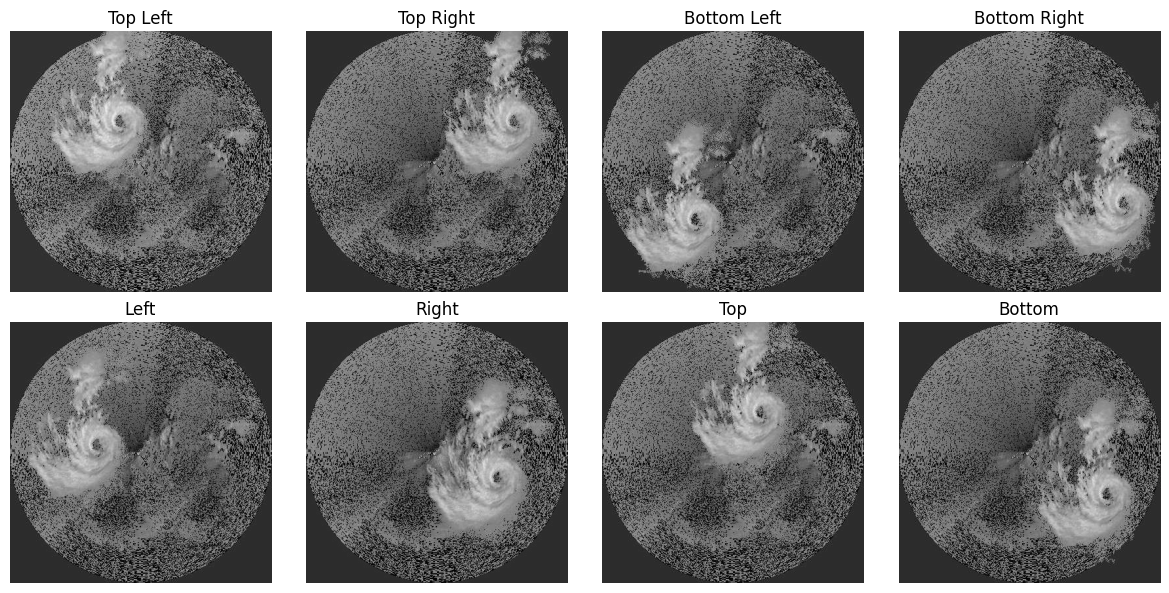

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image


# Define position names
position_names = [
    "Top Left",
    "Top Right",
    "Bottom Left",
    "Bottom Right",
    "Left",
    "Right",
    "Top",
    "Bottom",
]

output_directory = "/content/"
os.makedirs(output_directory, exist_ok=True)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Iterate through the position names
for i, position_name in enumerate(position_names):
    # Construct the image filename based on the position name
    image_name = f"{position_name}.jpg"
    image_path = os.path.join(output_directory, image_name)

    # Load the image
    image = Image.open(image_path)

    plt.subplot(2, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(position_name)  # Use position name as the title
    plt.axis('off')

# Adjust layout to eliminate extra spaces between images
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image


# Define positions and corresponding names
positions = [
    (70, 120),   # Top Left
    (250, 120),  # Top Right
    (70, 250),   # Bottom Left
    (240, 250),  # Bottom Right
    (60, 200),   # Left
    (240, 200),  # Right
    (200, 60),  # Top
    (200, 250),  # Bottom
]

position_names = [
    "Top Left",
    "Top Right",
    "Bottom Left",
    "Bottom Right",
    "Left",
    "Right",
    "Top",
    "Bottom",
]

output_directory = "/content/position_cyclone"
os.makedirs(output_directory, exist_ok=True)
image = cv2.imread('/content/drive/MyDrive/titli/titli/1.jpg', cv2.IMREAD_GRAYSCALE)
result_image = cv2.imread('/content/drive/MyDrive/titli/background/1.jpg', cv2.IMREAD_GRAYSCALE)
inverted_image = cv2.imread('/content/drive/MyDrive/titli/mask_folder/1.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

for i, (x, y) in enumerate(positions):
    composition = add_obj(result_image, image, inverted_image, x, y)

    # Define the file path for each image
    file_path = os.path.join(output_directory, f"position_{position_names[i]}.jpg")

    # Convert the image to 'L' mode (grayscale)
    composition_gray = Image.fromarray(composition).convert('L')

    # Save the image in JPG format
    composition_gray.save(file_path)

    plt.subplot(2, 4, i + 1)
    plt.imshow(composition_gray, cmap='gray')
    plt.title(position_names[i])
    plt.axis('off')

# Adjust layout to eliminate extra spaces between images
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import os

directory = '/content/drive/MyDrive/Cyclone images/Top right'  # Replace with the path to your directory

for filename in os.listdir(directory):
    if filename.startswith('tr') and filename.endswith('.jpg'):
        new_filename = filename.replace('tr', '')
        os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))


In [ ]:
!unzip "/content/drive/MyDrive/Cyclone images/train_data.zip" -d "/content"

In [ ]:
import os

folder_path = '/content/train_data/labels/val'  # Replace this with your folder path

def process_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Remove lines starting with '1'
    lines = [line for line in lines if not line.startswith('1')]

    # If the first line starts with '0', keep it, else make the second line as the first
    if lines and not lines[0].startswith('0'):
        lines = lines[1:]

    # Write modified content back to the file
    with open(file_path, 'w') as file:
        file.writelines(lines)

# Process all text files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        process_file(file_path)


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
!python train.py --img 640 --batch 16 --epochs 200 --data custom.yaml --weights yolov5m.pt --cache

2023-11-29 11:37:51.525211: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 11:37:51.525293: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 11:37:51.525345: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.2 --source /content/GMS501090503.200115.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/GMS501090503.200115.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/GMS501090503.200115.jpg: 640x640 1 cyclone eye, 26.9ms
Speed: 0.7ms pre-process, 26.9ms inference, 112.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
import shutil

# Replace 'folder_to_zip' with the name of your folder
folder_to_zip = '/content/yolov5'

# Replace 'output_filename.zip' with the desired name for your zip file
output_filename = '/content/yolov5.zip'

# Create a zip file of the folder
shutil.make_archive(output_filename.split('.')[0], 'zip', folder_to_zip)

# Download the zip file
from google.colab import files
files.download(output_filename)

In [ ]:
!python val.py --weight runs/train/exp/weights/best.pt --data custom.yaml --task test --name validation --augment

val: data=/content/yolov5/data/custom.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=validation, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning /content/drive/MyDrive/train_data/labels/test... 18 images, 2 backgrounds, 0 corrupt: 100% 20/20 [00:07<00:00,  2.63it/s]
test: New cache created: /content/drive/MyDrive/train_data/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.43s/it]
                   all         20         19      0.894      0.893      0.871      0.331
Speed: 0.2ms 

In [ ]:
!zip -r /content/newpicturepredictions.zip /content/predictions

In [ ]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread('/content/7.jpg',cv2.IMREAD_GRAYSCALE)

# Load the mask where the object is black and background is white
mask = cv2.imread('/content/7 (1).jpg', cv2.IMREAD_GRAYSCALE)

# Create a new image with a black background
output = np.zeros_like(image)

# Set the object (black in the mask) to the same grayscale color in the output
output[mask == 0] = image[mask == 0]

# Save or display the extracted object
cv2.imwrite('extracted_object.jpg', output)

cv2_imshow(output)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-28 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


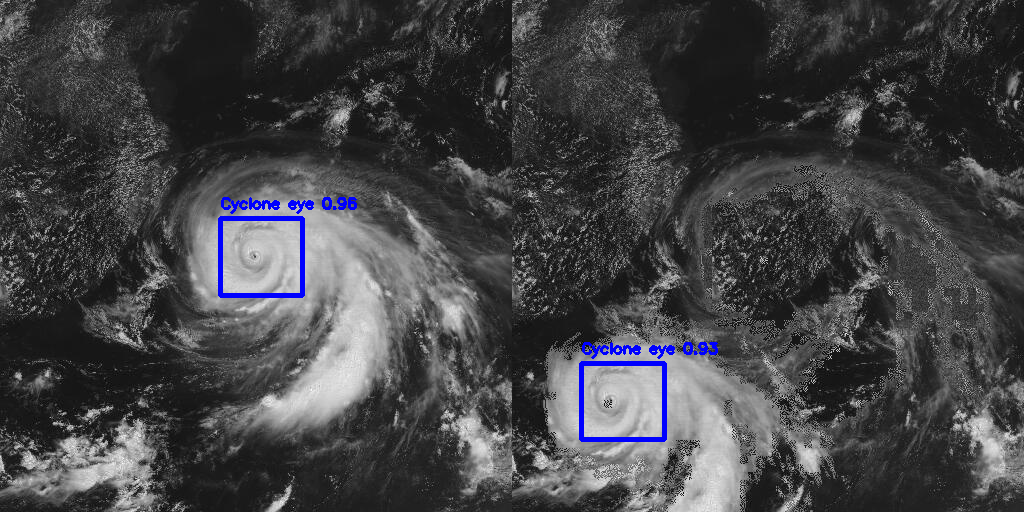

In [ ]:
import torch
from pathlib import Path
import cv2
from google.colab.patches import cv2_imshow
# Load YOLOv5 model
weights = '/content/drive/MyDrive/best200.pt'  # Replace with the path to your best.pt file
model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights)

# Function to draw bounding boxes for a specific class
def draw_boxes(image, class_0_predictions, threshold=0.25, thickness=2, color=(0, 255, 0)):
    for pred in class_0_predictions:
        x1, y1, x2, y2, conf, class_id = pred.tolist()
        if class_id == 0 and conf > threshold:  # Display only if class is 0 and confidence is above threshold
            box_color = color
            image = cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), box_color, thickness)
            label = f"Cyclone eye {conf:.2f}"  # Customize label here
            image = cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 2)

    return image
# Load an image
image_path = '/content/drive/MyDrive/Cyclone images/CombinedDataset/100_Bottom left.jpg'  # Replace with the path to your image

img = cv2.imread(image_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Run inference
results = model(gray_image)

# Get predictions for class 0
all_predictions = results.pred[0]  # Assuming class 0 index is 0, adjust if different

# Modify bounding box threshold, thickness, color, and display only class 0 above the threshold
threshold_confidence = 0.1  # Set your desired confidence threshold
thickness = 4
box_color = (255, 0, 0)  # Green color

# Draw bounding boxes for class 0 above the threshold
modified_image = draw_boxes(img.copy(), all_predictions, threshold_confidence, thickness, box_color)

cv2_imshow(modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# import os

# folder_path = '/content/drive/MyDrive/train_data/labels/test'  # Replace this with your folder path

# def process_file(file_path):
#     with open(file_path, 'r') as file:
#         lines = file.readlines()

#     # Remove lines starting with '1'
#     lines = [line for line in lines if not line.startswith('1')]

#     # If the first line starts with '0', keep it, else make the second line as the first
#     if lines and not lines[0].startswith('0'):
#         lines = lines[1:]

#     # Write modified content back to the file
#     with open(file_path, 'w') as file:
#         file.writelines(lines)

# # Process all text files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith('.txt'):
#         file_path = os.path.join(folder_path, filename)
#         process_file(file_path)



In [ ]:
import torch
from pathlib import Path
import cv2
from google.colab.patches import cv2_imshow

# Load YOLOv5 model
weights = '/content/drive/MyDrive/best200.pt'  # Replace with the path to your best.pt file
model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights)

# Function to draw dots at the center of bounding boxes for a specific class
def draw_center_dots(image, class_0_predictions, threshold=0.25, radius=5, color=(0, 255, 0)):
    for pred in class_0_predictions:
        x1, y1, x2, y2, conf, class_id = pred.tolist()
        if class_id == 0 and conf > threshold:  # Display only if class is 0 and confidence is above threshold
            center_x = int((x1 + x2) / 2)
            center_y = int((y1 + y2) / 2)
            dot_color = color
            image = cv2.circle(image, (center_x, center_y), radius, dot_color, -1)

    return image

# Load an image
image_path = '/content/drive/MyDrive/Cyclone images/CombinedDataset/100_Bottom left.jpg'  # Replace with the path to your image
img = cv2.imread(image_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Run inference
results = model(gray_image)

# Get predictions for class 0
all_predictions = results.pred[0]  # Assuming class 0 index is 0, adjust if different

# Modify dot radius, color, and display only class 0 above the threshold
threshold_confidence = 0.2  # Set your desired confidence threshold
dot_radius = 5
dot_color = (255, 0, 0)  # Red color

# Draw dots at the center of bounding boxes for class 0 above the threshold
modified_image = draw_center_dots(img.copy(), all_predictions, threshold_confidence, dot_radius, dot_color)

cv2_imshow(modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
